# Proyecto 1

**Tema:** Predicción de enfermedades Cardíacas



|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Discretizar Variables

### Variables Numéricas

- Edad (age)
- Presión Arterial en Reposo (trestbps)
- Colesterol Sérico (chol)
- Frecuencia Cardiaca Máxima (thalach)
- Depresion del ST Inducida por Ejercicio en Relación con Reposo (oldpeak)

## Librerías Requeridas

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de Datos

In [35]:
columnas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv("../Data/processed.cleveland.data", names=columnas)

df.age = df.age.astype(int)
df.sex = df.sex.astype(int)
df.cp = df.cp.astype(int)
df.trestbps = df.trestbps.astype(int)
df.chol = df.chol.astype(int)
df.fbs = df.fbs.astype(int)
df.restecg = df.restecg.astype(int)
df.thalach = df.thalach.astype(int)
df.exang = df.exang.astype(int)
df.slope = df.slope.astype(int)

# ------------
# Null values
# ------------

df['caNull'] = df['ca']
df.loc[df['caNull'] == '?', 'ca'] = float(df.ca.mode()[0])
df.loc[df['caNull'] != '?', 'ca'] = df['ca']
df['ca'] = pd.to_numeric(df['ca']).astype('int32')

df['thalNull'] = df['thal']
df.loc[df['thalNull'] == '?', 'thal'] = float(df.thal.mode()[0])
df.loc[df['thalNull'] != '?', 'thal'] = df['thal']
df['thal'] = pd.to_numeric(df['thal']).astype('int32')

# ------------
# Target
# ------------

df.loc[df['num'] == 0, 'heartdis'] = 0
df.loc[df['num'] != 0, 'heartdis'] = 1
df.heartdis = df.heartdis.astype(int)

# ------------
# Drop columns
# ------------
df.drop(['num', 'caNull', 'thalNull'], axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


## Discretización

### Age

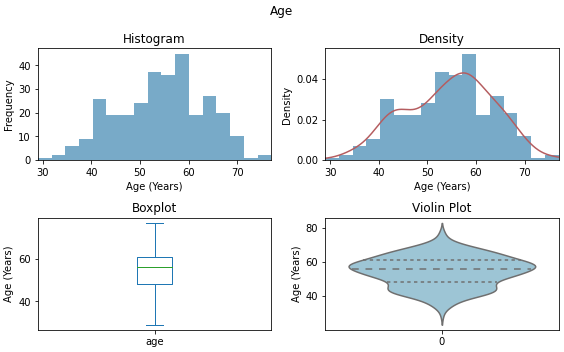

Depende o afecta las variables ca, trestbps y thalach

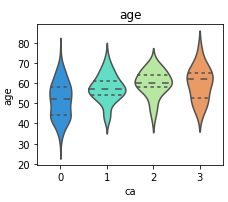

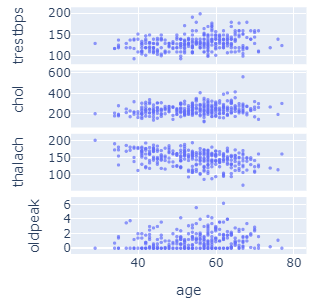

Distribución de campana, algo simétrica y las variables afectadas no muestran algo que permita una clasificación, a execepción de ca donde desde alrededor de 52 años (mediana cuando ca es 0) cambia la distribución.


Utilizar este valor como separador puede ser sesgado para las inferencias deseadas por lo que se plantearan rangos a partir de los cuartiles para discretizar:

- [$-\infty - Q_1$): 1
- [$Q_1$ - $Q_2$): 2
- [$Q_2$ - $Q_3$): 3
- [$Q_3 - \infty$): 4

In [36]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [37]:
df['ageNum'] = df['age']

q1 = df['ageNum'].describe()['25%']
q2 = df['ageNum'].describe()['50%']
q3 = df['ageNum'].describe()['75%']

df.loc[df['ageNum'] < q1, 'age'] = 1
df.loc[(q1 <= df['ageNum']) & (df['ageNum'] < q2), 'age'] = 2
df.loc[(q2 <= df['ageNum']) & (df['ageNum'] < q3), 'age'] = 3
df.loc[(q3 <= df['ageNum']) & (df['ageNum'] < 80), 'age'] = 4
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis,ageNum
0,4,1,1,145,233,1,2,150,0,2.3,3,0,6,0,63
1,4,1,4,160,286,0,2,108,1,1.5,2,3,3,1,67
2,4,1,4,120,229,0,2,129,1,2.6,2,2,7,1,67
3,1,1,3,130,250,0,0,187,0,3.5,3,0,3,0,37
4,1,0,2,130,204,0,2,172,0,1.4,1,0,3,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,1,110,264,0,0,132,0,1.2,2,0,7,1,45
299,4,1,4,144,193,1,0,141,0,3.4,2,2,7,1,68
300,3,1,4,130,131,0,0,115,1,1.2,2,1,7,1,57
301,3,0,2,130,236,0,2,174,0,0.0,2,1,3,1,57


### Trestbps

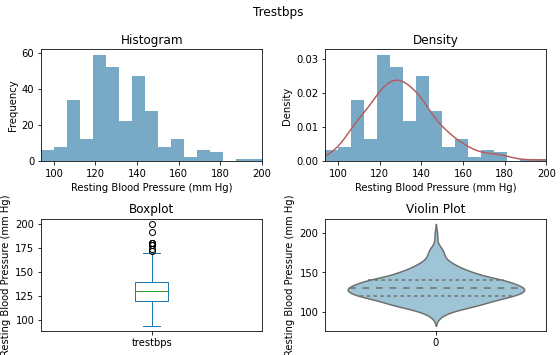

Depende o afecta por la variable age

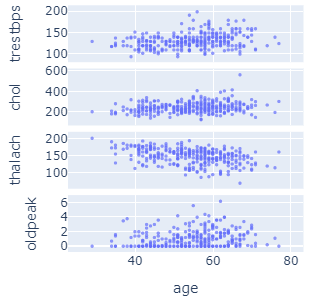

Distribución de campana, casi simétrica.



Se usa la media para discretizar

- [0 - $\bar{x} $): 1
- [$\bar{x} $ - $\infty$): 2

In [38]:
df['trestbps'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [39]:
df['trestbpsNum'] = df['trestbps']

mean = df['trestbps'].mean()

df.loc[df['trestbpsNum'] < mean, 'trestbps'] = 1
df.loc[(mean <= df['trestbpsNum']) & (df['trestbpsNum'] < 100000), 'trestbps'] = 2
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis,ageNum,trestbpsNum
0,4,1,1,2,233,1,2,150,0,2.3,3,0,6,0,63,145
1,4,1,4,2,286,0,2,108,1,1.5,2,3,3,1,67,160
2,4,1,4,1,229,0,2,129,1,2.6,2,2,7,1,67,120
3,1,1,3,1,250,0,0,187,0,3.5,3,0,3,0,37,130
4,1,0,2,1,204,0,2,172,0,1.4,1,0,3,0,41,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,1,1,264,0,0,132,0,1.2,2,0,7,1,45,110
299,4,1,4,2,193,1,0,141,0,3.4,2,2,7,1,68,144
300,3,1,4,1,131,0,0,115,1,1.2,2,1,7,1,57,130
301,3,0,2,1,236,0,2,174,0,0.0,2,1,3,1,57,130


### Chol

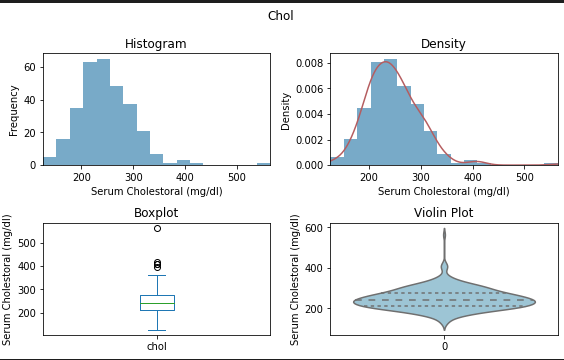

No depende o afecta ninguna variable

Distribución de campana, casi simétrica.




Se usa la media para discretizar:

- [0 - $\bar{x} $): 1
- [$\bar{x} $ - $\infty$): 2

In [40]:
df['chol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [41]:
df['cholNum'] = df['chol']

mean = df['chol'].mean()

df.loc[df['cholNum'] < mean, 'chol'] = 1
df.loc[(mean <= df['cholNum']) & (df['cholNum'] < 100000), 'chol'] = 2
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis,ageNum,trestbpsNum,cholNum
0,4,1,1,2,1,1,2,150,0,2.3,3,0,6,0,63,145,233
1,4,1,4,2,2,0,2,108,1,1.5,2,3,3,1,67,160,286
2,4,1,4,1,1,0,2,129,1,2.6,2,2,7,1,67,120,229
3,1,1,3,1,2,0,0,187,0,3.5,3,0,3,0,37,130,250
4,1,0,2,1,1,0,2,172,0,1.4,1,0,3,0,41,130,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,1,1,2,0,0,132,0,1.2,2,0,7,1,45,110,264
299,4,1,4,2,1,1,0,141,0,3.4,2,2,7,1,68,144,193
300,3,1,4,1,1,0,0,115,1,1.2,2,1,7,1,57,130,131
301,3,0,2,1,1,0,2,174,0,0.0,2,1,3,1,57,130,236


### Thalach

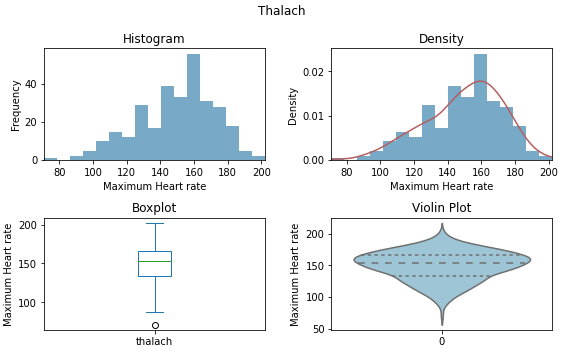

Depende o afecta las variables restecg, exang, slope, ca, heartdis, age

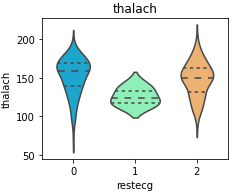

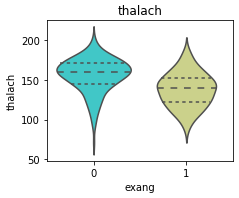

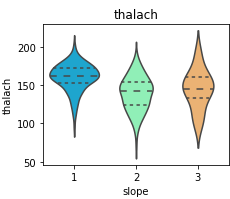

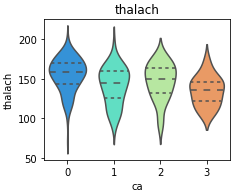

Distribución de campana, casi simétrica. Se observa una división en las variables en 2 categorías, antes y después del segundo cuartil.


Se usa el segundo cuartil para discretizar:

- [0 - $q_2 $): 1
- [$q_2$ - $\infty$): 2

In [42]:
df['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [43]:
df['thalachNum'] = df['thalach']

q1 = df['thalachNum'].describe()['50%']

df.loc[df['thalachNum'] < q1, 'thalach'] = 1
df.loc[(q1 <= df['thalachNum']) & (df['thalachNum'] < 100000), 'thalach'] = 2
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis,ageNum,trestbpsNum,cholNum,thalachNum
0,4,1,1,2,1,1,2,1,0,2.3,3,0,6,0,63,145,233,150
1,4,1,4,2,2,0,2,1,1,1.5,2,3,3,1,67,160,286,108
2,4,1,4,1,1,0,2,1,1,2.6,2,2,7,1,67,120,229,129
3,1,1,3,1,2,0,0,2,0,3.5,3,0,3,0,37,130,250,187
4,1,0,2,1,1,0,2,2,0,1.4,1,0,3,0,41,130,204,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,1,1,2,0,0,1,0,1.2,2,0,7,1,45,110,264,132
299,4,1,4,2,1,1,0,1,0,3.4,2,2,7,1,68,144,193,141
300,3,1,4,1,1,0,0,1,1,1.2,2,1,7,1,57,130,131,115
301,3,0,2,1,1,0,2,2,0,0.0,2,1,3,1,57,130,236,174


### Oldpeak

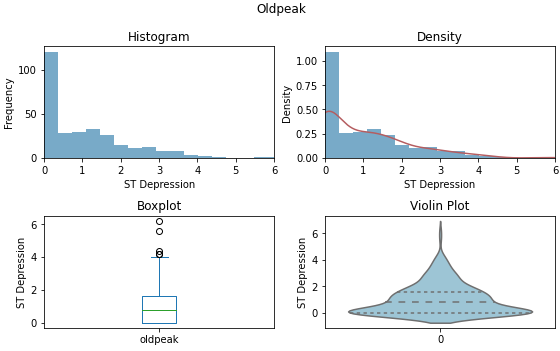

Depende o afecta las variables restecg, exang, slope, ca, thal y heartdis

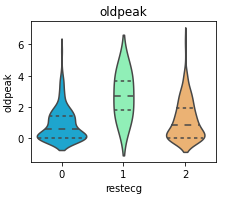

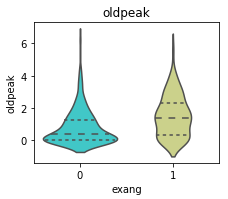

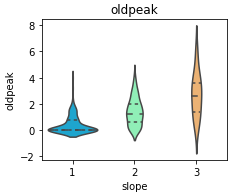

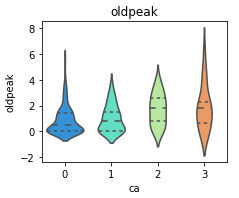

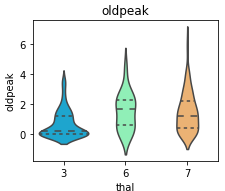

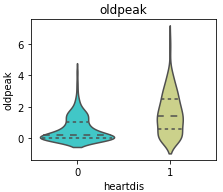


Se plantea la siguiente dicretización:

- [0 - $0.5$): 1
- [ $0.5 - 1$ ): 2
- [ $1 - 1.5$ ): 3
- [ $1.5 - 2$ ): 4
- [ $ 2 - \infty$ ): 5

In [44]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [45]:
df['oldpeakNum'] = df['oldpeak']

df.loc[df['oldpeakNum'] < 0.5, 'oldpeak'] = 1
df.loc[(0.5 <= df['oldpeakNum']) & (df['oldpeakNum'] < 1), 'oldpeak'] = 2
df.loc[(1 <= df['oldpeakNum']) & (df['oldpeakNum'] < 1.5), 'oldpeak'] = 3
df.loc[(1.5 <= df['oldpeakNum']) & (df['oldpeakNum'] < 2), 'oldpeak'] = 4
df.loc[(2 <= df['oldpeakNum']) & (df['oldpeakNum'] < 10), 'oldpeak'] = 5

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis,ageNum,trestbpsNum,cholNum,thalachNum,oldpeakNum
0,4,1,1,2,1,1,2,1,0,5.0,3,0,6,0,63,145,233,150,2.3
1,4,1,4,2,2,0,2,1,1,4.0,2,3,3,1,67,160,286,108,1.5
2,4,1,4,1,1,0,2,1,1,5.0,2,2,7,1,67,120,229,129,2.6
3,1,1,3,1,2,0,0,2,0,5.0,3,0,3,0,37,130,250,187,3.5
4,1,0,2,1,1,0,2,2,0,3.0,1,0,3,0,41,130,204,172,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,1,1,2,0,0,1,0,3.0,2,0,7,1,45,110,264,132,1.2
299,4,1,4,2,1,1,0,1,0,5.0,2,2,7,1,68,144,193,141,3.4
300,3,1,4,1,1,0,0,1,1,3.0,2,1,7,1,57,130,131,115,1.2
301,3,0,2,1,1,0,2,2,0,1.0,2,1,3,1,57,130,236,174,0.0
